В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [55]:
df = pd.read_csv('/Users/shein/ML_course/Data/cars.csv')

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [56]:
df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [57]:
df.columns = df.columns.str.lower()

**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   car_id             100 non-null    int64 
 1   brand              100 non-null    object
 2   model              100 non-null    object
 3   year               100 non-null    int64 
 4   kilometers_driven  100 non-null    int64 
 5   fuel_type          100 non-null    object
 6   transmission       100 non-null    object
 7   owner_type         100 non-null    object
 8   mileage            100 non-null    int64 
 9   engine             100 non-null    int64 
 10  power              100 non-null    int64 
 11  seats              100 non-null    int64 
 12  price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [59]:
df[['brand','model','fuel_type','transmission','owner_type']].apply(lambda x: x.unique())

brand           [Toyota, Honda, Ford, Maruti, Hyundai, Tata, M...
model           [Corolla, Civic, Mustang, Swift, Sonata, Nexon...
fuel_type                                        [Petrol, Diesel]
transmission                                  [Manual, Automatic]
owner_type                                 [First, Second, Third]
dtype: object

В наборі даних 13 колонок: 8 числових і 5 категоріальних, серед них: 
2 бінарні колонки
2 мультикатегоріальні колонки без відношення порядку
1 колонка, де можна встановити відношення порядку. 

In [ ]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
df.columns

Index(['car_id', 'brand', 'model', 'year', 'kilometers_driven', 'fuel_type',
       'transmission', 'owner_type', 'mileage', 'engine', 'power', 'seats',
       'price'],
      dtype='object')

In [62]:
inputs = df[['car_id', 'brand', 'model', 'year', 'kilometers_driven', 'fuel_type',
       'transmission', 'owner_type', 'mileage', 'engine', 'power', 'seats']]
targets = df.price

In [63]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [64]:
df[['fuel_type', 'transmission']].describe()

,fuel_type,transmission
count,100,100
unique,2,2
top,Petrol,Automatic
freq,52,57


In [65]:
fuel_code = {'Diesel': 0, 'Petrol': 1}
df['fuel_code'] = df.fuel_type.map(fuel_code)

In [66]:
transmission_code = {'Manual': 0, 'Automatic': 1}
df['transmission_code'] = df.transmission.map(transmission_code)

In [67]:
df.head()

,car_id,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price,fuel_code,transmission_code
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,1,0
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,1,1
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,1,1
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,0,0
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,0,1


In [68]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [69]:
train_one_hot = enc.transform(X_train[['brand']]).toarray()
test_one_hot = enc.transform(X_test[['brand']]).toarray()

In [70]:
X_train[enc.categories_[0]] = train_one_hot
X_test[enc.categories_[0]] = test_one_hot

In [71]:
X_test.columns

Index(['car_id', 'brand', 'model', 'year', 'kilometers_driven', 'fuel_type',
       'transmission', 'owner_type', 'mileage', 'engine', 'power', 'seats',
       'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen'],
      dtype='object')

In [72]:
X_train[['fuel_code', 'transmission_code']] = df[['fuel_code', 'transmission_code']]
X_test[['fuel_code', 'transmission_code']] = df[['fuel_code', 'transmission_code']]

In [73]:
X_train.head()

,car_id,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,fuel_code,transmission_code
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1


In [74]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
ordenc.fit(X_train[['owner_type']])

X_train['owner_type_codes'] = ordenc.transform(X_train[['owner_type']])
X_test['owner_type_codes'] = ordenc.transform(X_test[['owner_type']])

Очікуваний результат після трансформацій:

In [75]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,car_id,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,fuel_code,transmission_code,owner_type_codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1.0


,car_id,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,fuel_code,transmission_code,owner_type_codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2.0


(None, None)

In [76]:
df.groupby('brand')['model'].unique()

brand
Audi                                   [A4, Q3, A6, A3, Q7, A5]
BMW                  [X1, 5 Series, X3, 7 Series, X5, 3 Series]
Ford          [Mustang, Endeavour, Figo, Aspire, Ranger, Eco...
Honda                                 [Civic, City, WR-V, BR-V]
Hyundai          [Sonata, Creta, Verna, Elantra, Santro, Venue]
Mahindra                                [Scorpio, Thar, XUV300]
Maruti                         [Swift, Ertiga, Vitara, S-Cross]
Mercedes                      [C-Class, GLC, E-Class, GLE, GLA]
Tata             [Nexon, Harrier, Altroz, Safari, Tigor, Tiago]
Toyota        [Corolla, Innova, Fortuner, Yaris, Camry, Inno...
Volkswagen           [Polo, Tiguan, Passat, Ameo, T-Roc, Vento]
Name: model, dtype: object

In [77]:
df.model.nunique()

58

In [78]:
print(df.year.min(), df.year.mean(), df.year.max())

2016 2018.39 2021


In [79]:
bins = [2016, 2018, 2021, float('inf')]
labels = ['Old', 'Medium', 'New']

# Створюємо тимчасову колонку, яка відповідає групам цін
X_train['year_group'] = pd.cut(X_train['year'], bins=bins, labels=labels, right=False)
X_test['year_group'] = pd.cut(X_test['year'], bins=bins, labels=labels, right=False)

# Групуємо модель за ціною
def model_grouping(row):
    if row['year_group'] == 'Old':
        return 'Model Group 1'
    elif row['year_group'] == 'Medium':
        return 'Model Group 2'
    else:
        return 'Model Group 3'

# Додайте нову колонку з групами моделей
X_train['model_grouped'] = X_train.apply(model_grouping, axis=1)
X_test['model_grouped'] = X_test.apply(model_grouping, axis=1)

In [80]:
X_train.head()

,car_id,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,fuel_code,transmission_code,owner_type_codes,year_group,model_grouped
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1.0,Medium,Model Group 2
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,Medium,Model Group 2
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,Medium,Model Group 2
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1.0,Old,Model Group 1
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1.0,Old,Model Group 1


In [81]:
ordenc1 = OrdinalEncoder(categories=[['Model Group 1', 'Model Group 2', 'Model Group 3']])
ordenc1.fit(X_train[['model_grouped']])

X_train['model_codes'] = ordenc1.transform(X_train[['model_grouped']])
X_test['model_codes'] = ordenc1.transform(X_test[['model_grouped']])

In [82]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,car_id,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,fuel_code,transmission_code,owner_type_codes,year_group,model_grouped,model_codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1.0,Medium,Model Group 2,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,Medium,Model Group 2,1.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,Medium,Model Group 2,1.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1.0,Old,Model Group 1,0.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1.0,Old,Model Group 1,0.0


,car_id,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,fuel_code,transmission_code,owner_type_codes,year_group,model_grouped,model_codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0,Old,Model Group 1,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2.0,Medium,Model Group 2,1.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1.0,Old,Model Group 1,0.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.0,Medium,Model Group 2,1.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2.0,Medium,Model Group 2,1.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [83]:
X_train.drop(['car_id', 'brand', 'model', 'fuel_type', 'transmission', 'owner_type', 'year_group', 'model_grouped'], axis=1, inplace=True)

In [84]:
X_test.drop(['car_id', 'brand', 'model', 'fuel_type', 'transmission', 'owner_type', 'year_group', 'model_grouped'], axis=1, inplace=True)

In [85]:
train_set = pd.concat([X_train, y_train], axis=1)
corr_matrix = train_set.corr()
corr_matrix

,year,kilometers_driven,mileage,engine,power,seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,fuel_code,transmission_code,owner_type_codes,model_codes,price
year,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,0.248515,-0.200603,-0.014499,0.787442,-0.233769
kilometers_driven,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.332351,-0.066491,-0.001772,-0.410551,-0.083951
mileage,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,-0.070112,-0.399164,0.026624,0.239047,-0.638404
engine,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.174455,0.456296,-0.196106,-0.273962,0.710561
power,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,0.076357,0.586910,-0.204309,-0.150600,0.849137
seats,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.412468,-0.070099,-0.043849,-0.149189,0.000979
Audi,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.008336,0.265132,-0.203925,-0.205294,0.328858
BMW,0.202517,-0.247042,-0.134105,0.287119,0.372652,-0.108079,-0.118678,1.000000,-0.126761,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,-0.048475,0.283188,0.009076,0.179407,0.477522
Ford,-0.150454,-0.009761,-0.296480,0.184231,0.240501,-0.161451,-0.118678,-0.126761,1.000000,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.109812,-0.122816,0.190586,-0.174977,-0.004592
Honda,-0.037437,0.057372,0.358630,-0.154491,-0.191810,0.200303,-0.086066,-0.091928,-0.091928,1.000000,-0.073521,-0.059235,-0.066667,-0.091928,-0.097590,-0.086066,-0.079954,-0.161425,-0.218620,-0.177705,0.130107,-0.209779


In [86]:
corr_matrix.loc[abs(corr_matrix['price']) >= 0.5, 'price']

mileage             -0.638404
engine               0.710561
power                0.849137
transmission_code    0.680731
price                1.000000
Name: price, dtype: float64

Три змінні мають позитивну кореляцію з таргетом і одна - негативну. Отже, найбільше на ціну автомобіля впливає потужність, об'єм двигуна, трансмісія та паливна ефективність. Цікаво, що рік випуску і пробіг мають слабку кореляцію з цільовою змінною.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [87]:
model = LinearRegression()

In [88]:
model.fit(X_train, y_train)

LinearRegression()

In [89]:
predictions_train = model.predict(X_train)

In [90]:
loss_train = np.sqrt(mean_squared_error(y_train, predictions_train))
loss_train

np.float64(188343.51101642096)

In [91]:
predictions_test = model.predict(X_test)

In [92]:
loss_test = np.sqrt(mean_squared_error(y_test, predictions_test))
loss_test

np.float64(228936.36381194374)

In [93]:
errors_test = y_test - predictions_test
errors_train = y_train - predictions_train

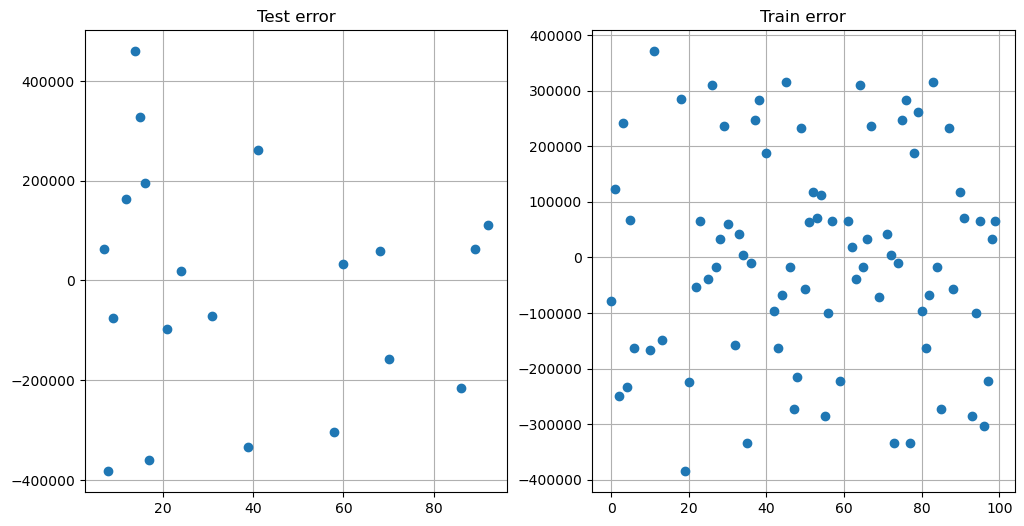

In [94]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(errors_test, 'o')
plt.title('Test error')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(errors_train, 'o')
plt.title('Train error')
plt.grid(True)

plt.show();

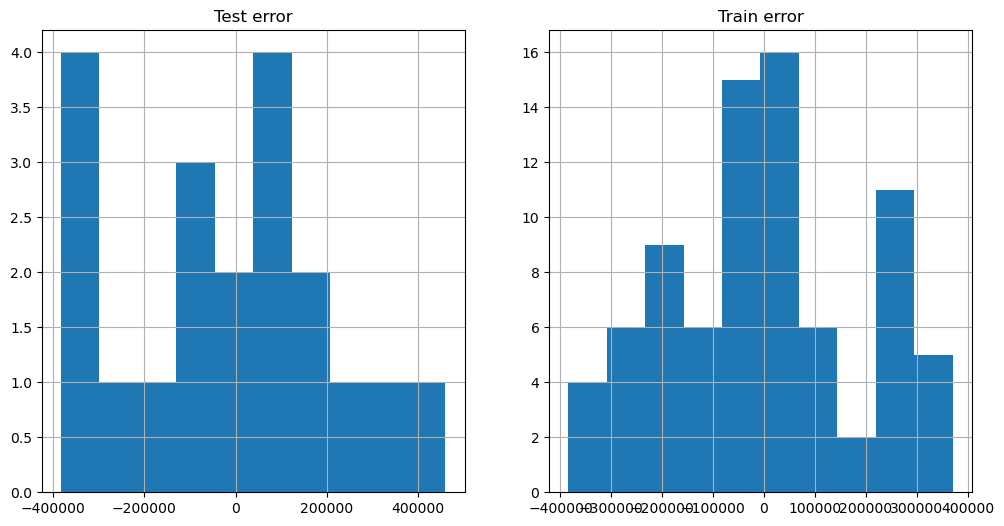

In [95]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(errors_test)
plt.title('Test error')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(errors_train)
plt.title('Train error')
plt.grid(True)

plt.show();

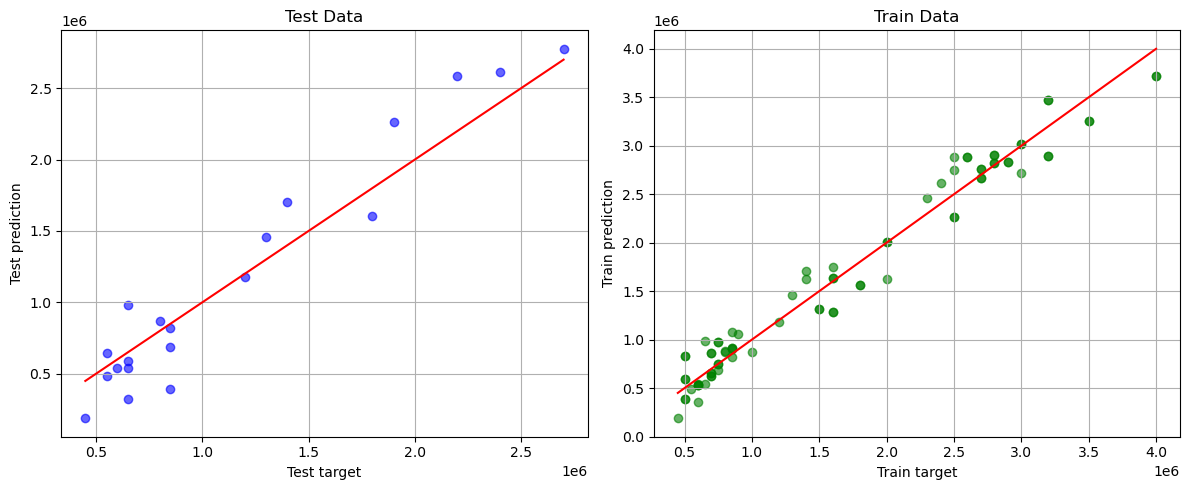

In [96]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions_test, c='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)],
         color='red', linestyle='-')
plt.xlabel('Test target')
plt.ylabel('Test prediction')
plt.title('Test Data')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.scatter(y_train, predictions_train, c='green', alpha=0.6)
plt.plot([min(y_train), max(y_train)],
         [min(y_train), max(y_train)],
         color='red', linestyle='-')
plt.xlabel('Train target')
plt.ylabel('Train prediction')
plt.title('Train Data')
plt.grid(True)

plt.tight_layout()
plt.show();

На обох графіках спосперіається позитивна кореляція, отже модель навчається правильно. Проте, RMSE для тренувального набору краще, ніж для тестового, що говорить про те, що на нових даних модель робить не дуже вдалий прогноз. Це також видно і з графіків, розсіювання на тестовому наборі більше. Також важливо зазначити, що помилки в тренувальному наборі близькі до нормального розподілу, тоді як помилки в тестовому наборі мають ненормальний розподіл. 

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [100]:
X_train.head()

,year,kilometers_driven,mileage,engine,power,seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,fuel_code,transmission_code,owner_type_codes,model_codes
83,2019,22000,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1.0,1.0
55,2018,28000,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,1.0
26,2018,28000,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,1.0
54,2017,32000,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1.0,0.0
19,2017,26000,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1.0,0.0


In [103]:
numerical_cols = ['year', 'kilometers_driven', 'mileage', 'engine', 'power']

In [104]:
numerical_cols

['year', 'kilometers_driven', 'mileage', 'engine', 'power']

In [105]:
X_train.columns

Index(['year', 'kilometers_driven', 'mileage', 'engine', 'power', 'seats',
       'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen', 'fuel_code',
       'transmission_code', 'owner_type_codes', 'model_codes'],
      dtype='object')

In [106]:
categorical_cols = ['seats','Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen', 'fuel_code',
       'transmission_code', 'owner_type_codes', 'model_codes']

In [150]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
scaled_inputs_train = scaler.transform(X_train[numerical_cols])
scaled_inputs_test = scaler.transform(X_test[numerical_cols])

In [152]:
model.fit(scaled_inputs_train, y_train)

LinearRegression()

In [154]:
model.coef_, model.intercept_

(array([-114374.67752862, -141741.92318115, -124019.62710676,
          27810.88036037,  733662.84215473]),
 np.float64(1680000.0000000044))

In [129]:
predictions_scaled_train = model.predict(std_scaled_train)

In [130]:
loss_scaled_train = np.sqrt(mean_squared_error(y_train, predictions_scaled_train))
loss_scaled_train

np.float64(531592.310559939)

In [131]:
predictions_scaled_test = model.predict(std_scaled_test)

In [132]:
loss_scaled_test = np.sqrt(mean_squared_error(y_test, predictions_scaled_test))
loss_scaled_test

np.float64(391964.9028258462)

In [133]:
categorical_data_train = X_train[categorical_cols].values

In [134]:
inputs = np.concatenate((std_scaled_train, categorical_data_train), axis=1)
targets = y_train

In [163]:
model.fit(inputs, targets)

LinearRegression()

In [164]:
column_names = numerical_cols + categorical_cols

In [172]:
weights_df = pd.DataFrame({
    'feature': np.append(numerical_cols + categorical_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
21,1,1.322485e+06
7,BMW,7.327103e+05
6,Audi,7.258298e+05
13,Mercedes,6.894581e+05
4,power,4.589311e+05
20,model_codes,4.171863e+05
18,transmission_code,2.805200e+05
15,Toyota,1.389850e+05
19,owner_type_codes,6.287989e+04
5,seats,-1.093680e+04


З точки зору коефіцієнтів найбільш значущими параметрами, що впливають на ціну, є бред (з переліку: "BMW, Audi, Mercedes"), потужність, модель та трансмісія. Такий вплив є цілком закономірним, адже сереж представлених брендів, саме BMW, Audi та Mercedes є умовно найдорожчими і найпопулярнішими на ринку. Чим більша потужність двигуна, тим вища вартість машини, що також закономірно. Оскільки модель закодована відносно року випуску (старші моделі позначені меншою цифрою), то позитивний вплив цього параметра на ціну також має сенс. В трансмісії автоматична коробка передач закодована як 1, а механічна - як 0, тому вплив на ціну в напрямку збільшення говорить про те, що машини на автоматі дорожчі, що також цілком виправдано. 

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [185]:
inputs_df = pd.DataFrame(inputs, columns=column_names)
inputs_df

,year,kilometers_driven,mileage,engine,power,seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,fuel_code,transmission_code,owner_type_codes,model_codes
0,0.568813,-0.693871,0.274862,-0.628491,-0.231967,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,-0.323442,-0.039533,-0.018324,0.087196,0.247012,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.323442,-0.039533,-0.604696,0.111560,0.910213,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,-1.215697,0.396692,0.274862,-0.476217,-0.784634,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,-1.215697,-0.257646,-1.484254,0.122219,0.910213,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.461068,0.178580,1.740791,-1.009176,-1.140798,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
76,-1.215697,-0.911983,-2.070625,4.629524,2.801564,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
77,-0.323442,1.814424,-0.604696,0.408494,-0.330219,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
78,0.568813,-0.693871,0.274862,0.128310,0.247012,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [197]:
targets = targets.reset_index(drop=True)

In [199]:
import statsmodels.api as sm

Y = targets
X = inputs_df
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const                1.212278e+06
year                -2.268298e+05
kilometers_driven   -1.771088e+05
mileage             -1.654258e+05
engine              -4.238756e+04
power                4.589311e+05
seats               -1.093680e+04
Audi                 8.360368e+05
BMW                  8.429174e+05
Ford                -1.742832e+05
Honda               -1.637895e+05
Hyundai             -3.864073e+05
Mahindra            -5.174585e+05
Maruti              -2.105073e+05
Mercedes             7.996652e+05
Tata                 4.414165e+04
Toyota               2.491920e+05
Volkswagen          -1.072295e+05
fuel_code           -3.955855e+05
transmission_code    2.805200e+05
owner_type_codes     6.287989e+04
model_codes          4.171863e+05
dtype: float64

In [200]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     85.94
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           3.24e-36
Time:                        21:37:38   Log-Likelihood:                -1085.2
No. Observations:                  80   AIC:                             2212.
Df Residuals:                      59   BIC:                             2262.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.212e+06   2.65e+0

На рівні статзначущості 0,05 наступні показники є значущими:   
const               4.574      0.000  
year               -2.949      0.005  
kilometers_driven  -3.237      0.002  
mileage            -3.124      0.003  
power               6.939      0.000  
Audi                8.276      0.000  
BMW                 9.134      0.000  
Hyundai            -3.946      0.000  
Mahindra           -4.444      0.000  
Mercedes            8.680      0.000  
fuel_code          -4.903      0.000  
transmission_code   3.512      0.001  
model_codes         3.819      0.000  
Проте, дані для навчання моделі мають високу мультиколінеарніть і ця модель нестабільна.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [202]:
inputs_stat = inputs_df[['year', 'kilometers_driven', 'mileage', 'power', 'Audi', 'BMW', 'Hyundai', 'Mahindra', 'Mercedes', 'fuel_code'
                         , 'transmission_code', 'model_codes']]

In [203]:
Y = targets
X = inputs_stat
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const                1.091302e+06
year                -1.998122e+05
kilometers_driven   -1.092413e+05
mileage             -1.739023e+05
power                3.981062e+05
Audi                 8.733607e+05
BMW                  9.626019e+05
Hyundai             -3.143606e+05
Mahindra            -4.376296e+05
Mercedes             8.870504e+05
fuel_code           -3.166338e+05
transmission_code    2.989920e+05
model_codes          4.101631e+05
dtype: float64

In [204]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           2.71e-41
Time:                        21:57:48   Log-Likelihood:                -1094.4
No. Observations:                  80   AIC:                             2215.
Df Residuals:                      67   BIC:                             2246.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.091e+06   1.08e+0

R-squared та Adj. R-squared змінились в межах 1%, тобто незначною мірою зменшились, проте kilometers_driven для моделі, навченої на меншому наборі даних, виявилась не статистично значущою змінною, що впливає на таргет. Решта змінних мають більший вплив на ціну, ніж у попередній моделі. Також у новій моделі збільшилась F-статистика, що вказує на більшу значимість моделі.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [207]:
inputs_stat_2 = inputs_df[['year', 'kilometers_driven', 'mileage', 'power', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra'
, 'Maruti', 'Mercedes', 'Toyota', 'fuel_code', 'transmission_code', 'model_codes']]

In [208]:
Y = targets
X = inputs_stat_2
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const                1.127910e+06
year                -2.052822e+05
kilometers_driven   -1.481575e+05
mileage             -1.421918e+05
power                4.217643e+05
Audi                 8.835452e+05
BMW                  9.232335e+05
Ford                -7.959111e+04
Honda               -1.732182e+05
Hyundai             -3.144038e+05
Mahindra            -4.651165e+05
Maruti              -1.556939e+05
Mercedes             8.759906e+05
Toyota               2.477124e+05
fuel_code           -3.392692e+05
transmission_code    2.726606e+05
model_codes          4.126057e+05
dtype: float64

In [209]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     111.7
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           6.33e-40
Time:                        22:18:32   Log-Likelihood:                -1086.2
No. Observations:                  80   AIC:                             2206.
Df Residuals:                      63   BIC:                             2247.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.128e+06   1.13e+0

R-squared та Adj. R-squared цієї моделі майже не відрізняються від показників першої моделі OLS, яка навчалась на усіх даних. Проте, у цієї моделі F-статистика більша, отже краще пояснює таргет, значущість цієї моделі більша. З трьох моделей я б обрала другу, у неї найвища F-статистика, а R-squared та Adj. R-squared в усіх моделях майже не відрізняються.